In [ ]:
###############################################################
# REP Analysis for the Flat Scan Sampling single core
# João Inácio, Mar. 31st, 2021
# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
# Simulation parameters

dim = "2D"
lattice = "SS"
NN = 4

L = 16
N_atm = 1 * L ** 2

max_E = (1 / 2) * NN * N_atm
max_M = N_atm
NE = int(1 + (max_E / 2))
NM = N_atm + 1
energies = np.linspace(- max_E, max_E, NE)
magnetizations = np.linspace(- max_M, max_M, NM)

REP = 10 ** 4

q_max = (NM + 1) // 2 - 2
if NM % 2 == 0:
    q_max = NM // 2 - 3
    
n_run = 15

# shuffle specific
skip = N_atm
shuffle_exp = np.array([0.5, 1, 2, 4])
shuffle_vals = N_atm * shuffle_exp
shuffle_vals = list(shuffle_vals)
shuffle_vals.append(10000)
shuffle_vals.append(100000)

# skip specific
skip_exp = np.array([1.0, 2, 4])
skip_vals = N_atm * skip_exp



[10000, 100000]


In [7]:
# Read shuffle data

n_run = 15

JDOS_all_shuffle = list()
for i in range(len(shuffle_vals)):
    JDOS_all_shuffle.append(list())

wall_time_all_shuffle = np.zeros((n_run, len(shuffle_vals)))
q_time_E_all_shuffle = np.zeros((n_run, len(shuffle_vals)))

cfg_chkbrd_shuffle = np.zeros((n_run, len(shuffle_vals)))
cfg_slice_shuffle = np.zeros((n_run, len(shuffle_vals)))

JDOS_mean_shuffle = list()
wall_time_mean_shuffle = list()
q_time_E_mean_shuffle = list()

k = 0
for shuffle in shuffle_exp:
    for run in range(1, n_run + 1):
        file_name = "".join(("./data/shuffle/", str(shuffle), "_N/" ,
                             str(run), "_shuffle_JDOS_FSS_Ising_", dim, "_", lattice, 
                             "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(skip)))
        JDOS = np.loadtxt(file_name + ".txt")
        JDOS[:, q_max+2:NM] = JDOS[:, range(q_max, -1, -1)]

        cfg_chkbrd_shuffle[run - 1, k] = JDOS[len(energies) - 1, q_max+1]
        cfg_slice_shuffle[run - 1, k] = JDOS[L, q_max+1]

        JDOS_all_shuffle[k].append(JDOS)

        with open(file_name + "_data.txt", 'r') as data_file:
            header = data_file.readline().strip("\n")

            q_time_E = np.zeros(q_max)
            for i in range(0, q_max):
                line = data_file.readline().strip("\n").split(" ")
                q_time_E[i] = float(line[4])

            wall_time_all_shuffle[run - 1, k] = float(data_file.readline().strip("\n"))
            q_time_E_all_shuffle[run - 1, k] = np.sum(q_time_E)
    
    JDOS_mean_shuffle.append(sum(JDOS_all_shuffle[k]) / n_run)
    wall_time_mean_shuffle.append(sum(wall_time_all_shuffle[:, k]) / n_run)
    q_time_E_mean_shuffle.append(np.average(q_time_E_all_shuffle[:, k]))
    
    print("shuffle:", shuffle_vals[k])
    print("Mean Wall time: {:.5f} seconds".format(wall_time_mean_shuffle[k]))
    print("Mean q_time / E: {:.5f} seconds".format(q_time_E_mean_shuffle[k]))
    print("------------------------------------")
    
    k += 1

for shuffle in shuffle_vals[-2:]:
    for run in range(1, n_run + 1):
        file_name = "".join(("./data/shuffle/", str(shuffle), "/" ,
                             str(run), "_shuffle_JDOS_FSS_Ising_", dim, "_", lattice, 
                             "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(skip)))
        JDOS = np.loadtxt(file_name + ".txt")
        JDOS[:, q_max+2:NM] = JDOS[:, range(q_max, -1, -1)]

        cfg_chkbrd_shuffle[run - 1, k] = JDOS[len(energies) - 1, q_max+1]
        cfg_slice_shuffle[run - 1, k] = JDOS[L, q_max+1]

        JDOS_all_shuffle[k].append(JDOS)

        with open(file_name + "_data.txt", 'r') as data_file:
            header = data_file.readline().strip("\n")

            q_time_E = np.zeros(q_max)
            for i in range(0, q_max):
                line = data_file.readline().strip("\n").split(" ")
                q_time_E[i] = float(line[4])

            wall_time_all_shuffle[run - 1, k] = float(data_file.readline().strip("\n"))
            q_time_E_all_shuffle[run - 1, k] = np.sum(q_time_E)
    
    JDOS_mean_shuffle.append(sum(JDOS_all_shuffle[k]) / n_run)
    wall_time_mean_shuffle.append(sum(wall_time_all_shuffle[:, k]) / n_run)
    q_time_E_mean_shuffle.append(np.average(q_time_E_all_shuffle[:, k]))
    
    print("shuffle:", shuffle_vals[k])
    print("Mean Wall time: {:.5f} seconds".format(wall_time_mean_shuffle[k]))
    print("Mean q_time / E: {:.5f} seconds".format(q_time_E_mean_shuffle[k]))
    print("------------------------------------")
    
    k += 1


shuffle: 128.0
Mean Wall time: 3189.79000 seconds
Mean q_time / E: 23.90213 seconds
------------------------------------
shuffle: 256.0
Mean Wall time: 3217.22933 seconds
Mean q_time / E: 24.05393 seconds
------------------------------------
shuffle: 512.0
Mean Wall time: 3278.41600 seconds
Mean q_time / E: 24.71287 seconds
------------------------------------
shuffle: 1024.0
Mean Wall time: 3255.77533 seconds
Mean q_time / E: 24.28727 seconds
------------------------------------
shuffle: 10000
Mean Wall time: 3193.98533 seconds
Mean q_time / E: 24.04564 seconds
------------------------------------
shuffle: 100000
Mean Wall time: 3211.03667 seconds
Mean q_time / E: 24.05440 seconds
------------------------------------


In [8]:
# Read skip data

n_run = 15

JDOS_all_skip = list()
for i in range(len(skip_exp)):
    JDOS_all_skip.append(list())

wall_time_all_skip = np.zeros((n_run, len(skip_exp)))
q_time_E_all_skip = np.zeros((n_run, len(skip_exp)))

cfg_chkbrd_skip = np.zeros((n_run, len(skip_exp)))
cfg_slice_skip = np.zeros((n_run, len(skip_exp)))

JDOS_mean_skip = list()
wall_time_mean_skip = list()
q_time_E_mean_skip = list()

k = 0
for skip_e in skip_exp:
    for run in range(1, n_run + 1):
        file_name = "".join(("./data/skip/", str(skip_e), "_N/" ,
                             str(run), "_JDOS_FSS_Ising_", dim, "_", lattice, 
                             "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(int(skip_vals[k]))))
        JDOS = np.loadtxt(file_name + ".txt")
        JDOS[:, q_max+2:NM] = JDOS[:, range(q_max, -1, -1)]

        cfg_chkbrd_skip[run - 1, k] = JDOS[len(energies) - 1, q_max+1]
        cfg_slice_skip[run - 1, k] = JDOS[L, q_max+1]

        JDOS_all_skip[k].append(JDOS)

        with open(file_name + "_data.txt", 'r') as data_file:
            header = data_file.readline().strip("\n")

            q_time_E = np.zeros(q_max)
            for i in range(0, q_max):
                line = data_file.readline().strip("\n").split(" ")
                q_time_E[i] = float(line[4])

            wall_time_all_skip[run - 1, k] = float(data_file.readline().strip("\n"))
            q_time_E_all_skip[run - 1, k] = np.sum(q_time_E)
    
    JDOS_mean_skip.append(sum(JDOS_all_skip[k]) / n_run)
    wall_time_mean_skip.append(sum(wall_time_all_skip[:, k]) / n_run)
    q_time_E_mean_skip.append(np.average(q_time_E_all_skip[:, k]))
    
    print("skip:", skip_vals[k])
    print("Mean Wall time: {:.5f} seconds".format(wall_time_mean_skip[k]))
    print("Mean q_time / E: {:.5f} seconds".format(q_time_E_mean_skip[k]))
    print("------------------------------------")
    
    k += 1


skip: 256.0
Mean Wall time: 3222.28533 seconds
Mean q_time / E: 24.27694 seconds
------------------------------------
skip: 512.0
Mean Wall time: 4965.94200 seconds
Mean q_time / E: 38.12177 seconds
------------------------------------
skip: 1024.0
Mean Wall time: 7675.34800 seconds
Mean q_time / E: 60.35817 seconds
------------------------------------


In [9]:
# Get single core data

n_run = 15

JDOS_all = list()
wall_time_all = np.zeros(n_run)
q_time_E_all = np.zeros(n_run)

cfg_chkbrd = np.zeros(n_run)
cfg_slice = np.zeros(n_run)

for run in range(1, n_run + 1):
    file_name = "".join(("./data/single_core/", str(run), "_JDOS_FSS_Ising_", 
                         dim, "_", lattice, "_L", str(L), "_REP_1E",
                         str(int(np.log10(REP))), "_skip_", str(skip)))
    JDOS = np.loadtxt(file_name + ".txt")
    JDOS[:, q_max+2:NM] = JDOS[:, range(q_max, -1, -1)]
    
    cfg_chkbrd[run - 1] = JDOS[len(energies) - 1, q_max+1]
    cfg_slice[run - 1] = JDOS[L, q_max+1]

    JDOS_all.append(JDOS)
    
    with open(file_name + "_data.txt", 'r') as data_file:
        header = data_file.readline().strip("\n")
        
        q_time_E = np.zeros(q_max)
        for i in range(0, q_max):
            line = data_file.readline().strip("\n").split(" ")
            q_time_E[i] = float(line[4])

        wall_time_all[run - 1] = float(data_file.readline().strip("\n"))
        q_time_E_all[run - 1] = np.sum(q_time_E)

JDOS_mean = sum(JDOS_all) / n_run
wall_time_mean = sum(wall_time_all) / n_run
q_time_E_mean = np.average(q_time_E_all)
    
print("Mean Wall time: {:.5f} seconds".format(wall_time_mean))
print("Mean q_time / E: {:.5f} seconds".format(q_time_E_mean))


Mean Wall time: 10446.94667 seconds
Mean q_time / E: 88.48767 seconds


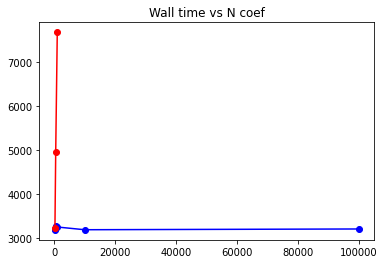

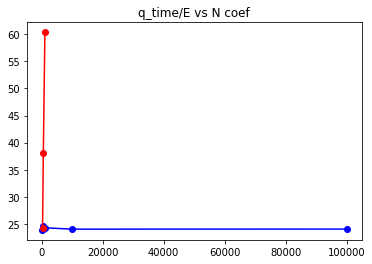

In [10]:
# Plot Wall time and q_time/E

# Wall time
plt.figure(1)
plt.plot(shuffle_vals, wall_time_mean_shuffle, '-ob')
plt.plot(skip_vals, wall_time_mean_skip, '-or')
plt.title("Wall time vs N coef")

#plt.figure(3)
#plt.hist(wall_time_all[:, 3], 25, density=True, alpha=1, edgecolor='black', linewidth=1.2)
    
# q_time/E
plt.figure(2)
plt.plot(shuffle_vals, q_time_E_mean_shuffle, '-ob')
plt.plot(skip_vals, q_time_E_mean_skip, '-or')
plt.title("q_time/E vs N coef")

#plt.figure(4)
#plt.hist(q_time_E_all[:, 3], 25, density=True, alpha=1, edgecolor='black', linewidth=1.2)

plt.show()


In [12]:
# Fit normal distributions to configurations - shuffle

fit_chkbrd_shuffle = np.zeros((len(shuffle_vals), 2))
fit_slice_shuffle = np.zeros((len(shuffle_vals), 2))
fit_zerozero_shuffle = np.zeros((len(shuffle_vals), 2))

for k in range(len(shuffle_vals)):
    print(shuffle_vals[k])
    
    # Checkerboard
    fit_chkbrd_shuffle[k] = norm.fit(cfg_chkbrd_shuffle[:, k])
    print("mean: {:.5f}; var: {:.5f}".format(fit_chkbrd_shuffle[k, 0], fit_chkbrd_shuffle[k, 1]))

    # Slice
    fit_slice_shuffle[k] = norm.fit(cfg_slice_shuffle[:, k])
    print("mean: {:.5f}; var: {:.5f}".format(fit_slice_shuffle[k, 0], fit_slice_shuffle[k, 1]))
    
    print("------------------------------------")


128.0
mean: 1.97684; var: 0.03658
mean: 30.76201; var: 7.66968
------------------------------------
256.0
mean: 1.97047; var: 0.02438
mean: 27.77447; var: 6.27325
------------------------------------
512.0
mean: 1.96577; var: 0.02950
mean: 28.06275; var: 6.25452
------------------------------------
1024.0
mean: 1.95096; var: 0.03706
mean: 28.77642; var: 6.77063
------------------------------------
10000
mean: 1.95856; var: 0.04323
mean: 29.18677; var: 7.14160
------------------------------------
100000
mean: 1.93746; var: 0.04177
mean: 31.08077; var: 5.95409
------------------------------------


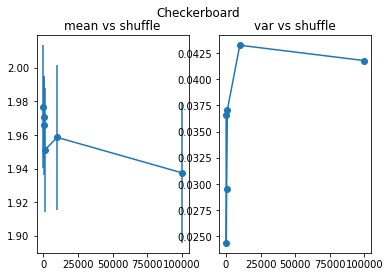

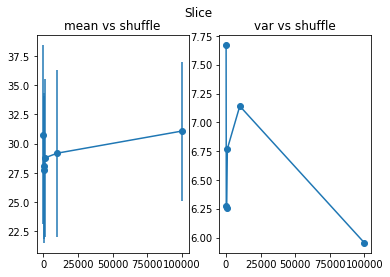

In [13]:
# Plot mean and var for the fitted distribuitions - shuffle

# Checkerboard
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.suptitle("Checkerboard")

ax1.errorbar(shuffle_vals, fit_chkbrd_shuffle[:, 0], fit_chkbrd_shuffle[:, 1], marker='o')
ax1.set_title("mean vs shuffle")

ax2.plot(shuffle_vals, fit_chkbrd_shuffle[:, 1], '-o')
ax2.set_title("var vs shuffle")

# Slice
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.suptitle("Slice")

ax1.errorbar(shuffle_vals, fit_slice_shuffle[:, 0], fit_slice_shuffle[:, 1], marker='o')
ax1.set_title("mean vs shuffle")

ax2.plot(shuffle_vals, fit_slice_shuffle[:, 1], '-o')
ax2.set_title("var vs shuffle")

plt.show()


In [14]:
# Fit normal distributions to configurations - skip

fit_chkbrd_skip = np.zeros((len(skip_vals), 2))
fit_slice_skip = np.zeros((len(skip_vals), 2))
fit_zerozero_skip = np.zeros((len(skip_vals), 2))

for k in range(len(skip_exp)):
    print(skip_vals[k])
    
    # Checkerboard
    fit_chkbrd_skip[k] = norm.fit(cfg_chkbrd_skip[:, k])
    print("mean: {:.5f}; var: {:.5f}".format(fit_chkbrd_skip[k, 0], fit_chkbrd_skip[k, 1]))

    # Slice
    fit_slice_skip[k] = norm.fit(cfg_slice_skip[:, k])
    print("mean: {:.5f}; var: {:.5f}".format(fit_slice_skip[k, 0], fit_slice_skip[k, 1]))
    
    print("------------------------------------")

256.0
mean: 1.99140; var: 0.04563
mean: 28.16317; var: 8.52696
------------------------------------
512.0
mean: 2.01661; var: 0.04076
mean: 33.22937; var: 3.64999
------------------------------------
1024.0
mean: 2.03256; var: 0.02292
mean: 31.84951; var: 3.03252
------------------------------------


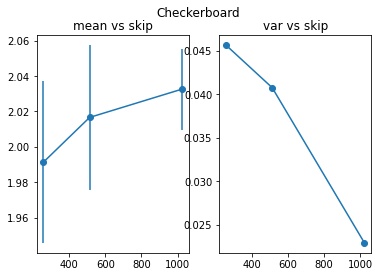

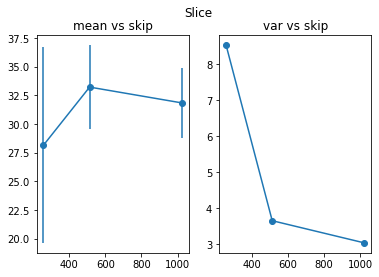

In [15]:
# Plot mean and var for the fitted distribuitions - skip

# Checkerboard
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.suptitle("Checkerboard")

ax1.errorbar(skip_vals, fit_chkbrd_skip[:, 0], fit_chkbrd_skip[:, 1], marker='o')
ax1.set_title("mean vs skip")

ax2.plot(skip_vals, fit_chkbrd_skip[:, 1], '-o')
ax2.set_title("var vs skip")

# Slice
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.suptitle("Slice")

ax1.errorbar(skip_vals, fit_slice_skip[:, 0], fit_slice_skip[:, 1], marker='o')
ax1.set_title("mean vs skip")

ax2.plot(skip_vals, fit_slice_skip[:, 1], '-o')
ax2.set_title("var vs skip")

plt.show()


mean: 2.01330; var: 0.03453
mean: 32.61743; var: 6.96188


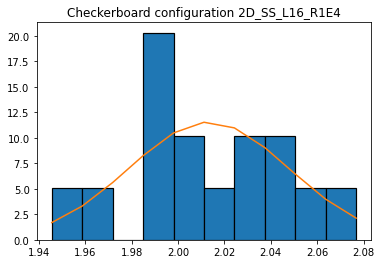

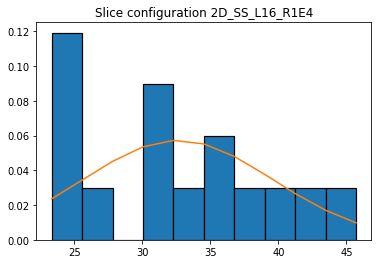

In [16]:
# Fit normal distributions to configurations

# Checkerboard
plt.figure(1)
_, bins, _ = plt.hist(cfg_chkbrd, 10, density=True, alpha=1, edgecolor='black', linewidth=1.2)

fit_chkbrd = norm.fit(cfg_chkbrd)
best_fit_line = norm.pdf(bins, fit_chkbrd[0], fit_chkbrd[1])
print("mean: {:.5f}; var: {:.5f}".format(fit_chkbrd[0], fit_chkbrd[1]))

plt.plot(bins, best_fit_line)
plt.title("Checkerboard configuration " + dim + "_" + 
          lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))

# Slice
plt.figure(2)
_, bins, _ = plt.hist(cfg_slice, 10, density=True, alpha=1, edgecolor='black', linewidth=1.2)

fit_slice = norm.fit(cfg_slice)
best_fit_line = norm.pdf(bins, fit_slice[0], fit_slice[1])
print("mean: {:.5f}; var: {:.5f}".format(fit_slice[0], fit_slice[1]))

plt.plot(bins, best_fit_line)
plt.title("Slice configuration " + dim + "_" + 
          lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))

plt.show()
